In [63]:
import pandas as pd

In [64]:
data_duplicates=pd.read_csv("iris - Duplicate.csv")
data_outliers=pd.read_csv("iris - Outliers.csv")

# Duplicates

In [65]:
data_duplicates

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1001,5.1,3.5,1.4,0.2,setosa
1,1002,4.9,3.0,1.4,0.2,setosa
2,1002,4.9,3.0,1.4,0.2,setosa
3,1003,4.7,3.2,1.3,0.2,setosa
4,1004,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...,...
148,1146,6.7,3.0,5.2,2.3,virginica
149,1147,6.3,2.5,5.0,1.9,virginica
150,1148,6.5,3.0,5.2,2.0,virginica
151,1149,6.2,3.4,5.4,2.3,virginica


In [66]:
data_duplicates.duplicated()

0      False
1      False
2       True
3      False
4      False
       ...  
148    False
149    False
150    False
151    False
152    False
Length: 153, dtype: bool

In [67]:
data_duplicates.duplicated().sum()

3

In [68]:
#drop duplicates
data_duplicates.drop_duplicates(inplace=True)

In [69]:
data_duplicates.duplicated().sum()

0

# Outliers

In [70]:
data_outliers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,28.6,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,30.0,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


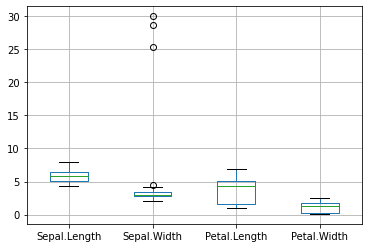

In [71]:
#using box plot
data_outliers.iloc[:,:4].boxplot()

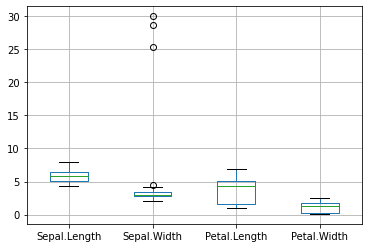

In [72]:
data_outliers.boxplot()

In [73]:
#edetecting using 1.5*IQR rule
Q1=data_outliers.quantile(0.25)
Q2=data_outliers.quantile(0.5)
Q3=data_outliers.quantile(0.75)

In [74]:
print("Q1:",Q1,"Q2:",Q2,"Q3:",Q3)

Q1: Sepal.Length    5.1
Sepal.Width     2.8
Petal.Length    1.6
Petal.Width     0.3
Name: 0.25, dtype: float64 Q2: Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
Name: 0.5, dtype: float64 Q3: Sepal.Length    6.4
Sepal.Width     3.4
Petal.Length    5.1
Petal.Width     1.8
Name: 0.75, dtype: float64


In [75]:
#inter quantiles range
IQR=Q3-Q1
IQR

Sepal.Length    1.3
Sepal.Width     0.6
Petal.Length    3.5
Petal.Width     1.5
dtype: float64

In [80]:
out_rows=((data_outliers<(Q1-1.5*IQR)) | (data_outliers>(Q3+1.5*IQR))).any(axis=1)

In [81]:
out_rows

0      False
1       True
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Length: 150, dtype: bool